In [1]:
## 1. Overview of the Data ##
import collections
import pandas as pd
import string
from sklearn.preprocessing import MinMaxScaler
from nltk.stem.wordnet import WordNetLemmatizer

%matplotlib inline

pll = pd.read_excel("PLL schedule.xlsx", sheet_name='PLL Masterlist', header = 3)

pll.columns

Index(['Owning Item', 'Package', 'Categories', 'Lesson Description',
       'Lesson Description Mod0', 'Lesson Description Mod', 'Cause',
       'Impact / Consequences', 'Action Title', 'Impact Level'],
      dtype='object')

In [2]:
## 2. Tokenizing the Titles ##

tokenized_titles = []
for title in pll['Lesson Description Mod']:
    token = title.split()
    tokenized_titles.append(token)

punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []

lmtzr = WordNetLemmatizer()
 
for title in tokenized_titles:
    #lowercase = [x.lower() for x in headline]
    tokens = []
    for token in title:
        token = token.lower().strip()
        for punc in punctuation:
            token = token.replace(punc,'')
        token_lemm = lmtzr.lemmatize(token)     
        tokens.append(token_lemm)
        
    clean_tokenized.append(tokens)

In [3]:
clean_tokenized[0:5]

[['construction',
  'manpower',
  'direct',
  'worker',
  'sufficiency',
  'were',
  'le',
  'affected',
  'by',
  'the',
  'low',
  'productivity',
  'and',
  'inconsistency',
  'of',
  'performance',
  'by',
  'local',
  'worker'],
 ['1',
  'no',
  'availability',
  'of',
  'epccrotating',
  'field',
  'engineer',
  'at',
  'site',
  '2',
  'no',
  'clear',
  'cut',
  'separation',
  'in',
  'term',
  'of',
  'role',
  'for',
  'rotating',
  'superintendentrotating',
  'field',
  'engineer',
  'at',
  'site'],
 ['1',
  'pdr',
  'statement',
  'is',
  'about',
  'the',
  'offline',
  '100%',
  'inergen',
  'spare',
  'scope',
  'deleted',
  'but',
  'the',
  'requirement',
  'of',
  'online',
  '100%',
  'spare',
  'inergen',
  'is',
  'compulsory',
  '2',
  'mismatch',
  'between',
  'pdr',
  'and',
  'bomba',
  'requirement'],
 ['1',
  'poor',
  'subcontract',
  'management',
  'by',
  'epcc',
  'contractor',
  'at',
  'site',
  '2',
  'poor',
  'coordination',
  'in',
  'subcontrac

In [ ]:
lmtzr = WordNetLemmatizer()
lemm_tokenized = []

for title in tokenized_titles:
    #lowercase = [x.lower() for x in headline]
    tokens = []
    for token in title:
        token = token.lower().strip()
        for punc in punctuation:
            token = token.replace(punc,'')
        tokenized = lmtzr.lemmatize(token)    
        tokens.append(tokenized)
        
    lemm_tokenized.append(tokens)

In [ ]:
lmtzr.lemmatize('cats') 

In [ ]:
lemm_tokenized[0:5]

In [4]:
## 3. Assembling a Matrix of Unique Words ##

import numpy as np
unique_tokens = []
single_tokens = []

for title in clean_tokenized:
    for token in title:
        if token not in single_tokens:
            single_tokens.append(token)
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)

print(len(single_tokens))
print(len(unique_tokens))

counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)), columns=unique_tokens)

3530
1890


In [5]:
## 4. Counting Token Occurrences ##

for row_idx, title in enumerate(clean_tokenized):
    for token in title:
        if token in unique_tokens:
            col_idx = unique_tokens.index(token)
            counts.iloc[row_idx,col_idx] += 1

In [6]:
## 5. Removing Columns to Increase Accuracy ##

word_counts = counts.sum()
counts = counts.loc[:,(word_counts >= 5) & (word_counts <= 210)]

print(counts.head())
print(word_counts.sort_values(ascending = False))
print(counts.shape)

   by  worker  no  field  engineer  at  site  1  100%  spare  ...   tracking  \
0   2       2   0      0         0   0     0  0     0      0  ...          0   
1   0       0   2      2         2   2     2  1     0      0  ...          0   
2   0       0   0      0         0   0     0  1     2      2  ...          0   
3   1       0   0      0         0   2     1  1     0      0  ...          0   
4   0       0   0      0         0   0     0  0     0      0  ...          0   

   waste  reviewing  monthly  hs  rgt2  sct  man  pdt  grid  
0      0          0        0   0     0    0    0    0     0  
1      0          0        0   0     0    0    0    0     0  
2      0          0        0   0     0    0    0    0     0  
3      0          0        0   0     0    0    0    0     0  
4      0          0        0   0     0    0    0    0     0  

[5 rows x 791 columns]
of              798
and             608
the             592
to              570
for             477
in              354
not

In [7]:
word_counts_row = counts.sum(axis = 1)
word_counts_row[word_counts_row>5].sort_values(ascending = False)

1670    79
1662    72
1616    52
1719    47
1401    45
1211    45
1655    45
1324    45
1461    43
1126    40
1444    38
1690    38
1247    37
1248    36
1691    33
1478    33
1442    32
1661    31
1373    31
1477    30
1459    29
1235    29
1517    27
1023    27
1720    27
1707    26
1708    26
344     25
421     25
299     24
        ..
211      6
1301     6
1325     6
287      6
694      6
292      6
354      6
1370     6
705      6
706      6
1356     6
719      6
1528     6
721      6
1535     6
1537     6
1348     6
725      6
331      6
740      6
741      6
749      6
754      6
758      6
765      6
767      6
1336     6
300      6
1571     6
1181     6
Length: 1054, dtype: int64

### 6. New Phase Column and see pll by phases and categories

tokenized_item = []
for item in pll["Owning Item"]:
    token = item.split('>')
    tokenized_item.append(token[3])

pll['Phase'] = tokenized_item
phases = pll.groupby(['Phase','Package','Categories']).size()
phases

In [8]:
### 7. modify columns for better accuracy

counts_cols = counts.columns.tolist()

new_col = []
for col in counts_cols:
    if len(col) > 3:
        new_col.append(col)

counts = counts[new_col]
#counts.drop(columns = ['best','practice'],axis = 1, inplace = True)
word_counts = counts.sum()
print(word_counts.sort_values(ascending = False))

contractor       206
project          194
with             168
requirement      165
work             130
from             130
site             129
engineering      122
during           115
late             112
document         112
vendor           110
equipment        105
epcc             100
construction      96
design            92
material          90
review            85
cable             79
owner             77
process           76
delay             71
piping            70
system            66
management        64
change            64
between           62
package           62
pipe              61
activity          60
                ... 
later              5
could              5
telecom            5
enough             5
regarding          5
manufacturing      5
attachment         5
clear              5
record             5
gland              5
making             5
matrix             5
bolt               5
started            5
discussed          5
agree              5
2016         

In [9]:
### 8. Convert data to boolean / binary

counts_binary = counts.astype(bool).astype(int)
counts_binary.sum().sort_values(ascending=False)

contractor      189
project         174
with            155
requirement     149
from            122
site            120
work            119
engineering     113
during          113
late            111
document        103
vendor           99
equipment        97
epcc             97
construction     91
design           89
material         73
process          72
owner            72
review           70
delay            68
piping           63
between          62
management       59
change           57
system           56
package          56
cable            55
activity         54
stage            54
               ... 
waste             4
numbering         4
channel           4
record            4
rating            4
coding            4
proceed           4
side              4
shell             4
head              4
2015              4
utility           4
flare             4
machine           4
toyo              4
proposal          4
emergency         4
telecom           4
fast              4


In [10]:
### 9. Calculate similarities

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(counts_binary)
similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.31622777]
 [0.         0.         0.         ... 0.         0.31622777 1.        ]]

pairwise sparse output:
   (0, 1678)	0.13608276348795434
  (0, 1668)	0.1543033499620919
  (0, 1623)	0.1543033499620919
  (0, 1609)	0.20412414523193154
  (0, 1607)	0.18257418583505539
  (0, 1554)	0.10540925533894598
  (0, 1491)	0.1543033499620919
  (0, 1476)	0.1543033499620919
  (0, 1416)	0.1543033499620919
  (0, 1369)	0.2357022603955159
  (0, 826)	0.11785113019775795
  (0, 818)	0.2357022603955159
  (0, 788)	0.2886751345948129
  (0, 438)	0.18257418583505539
  (0, 416)	0.2357022603955159
  (0, 415)	0.2357022603955159
  (0, 1720

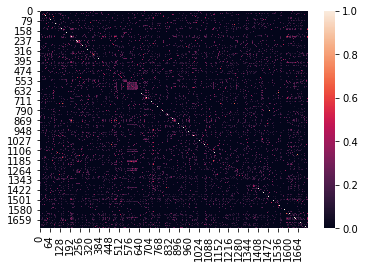

In [11]:
### 10. Convert correlation matrix into a pandas dataframe 

corrs_df = pd.DataFrame(similarities)

import seaborn as sns
sns.heatmap(corrs_df)

In [12]:
### 11. Unstack correlation matrix dataframe into series and convert it back into dataframe

corrs_series = corrs_df.unstack()
corrs_sorted = corrs_series.sort_values(ascending = False)

corrs_filtered = corrs_sorted[(corrs_sorted< 0.999) & (corrs_sorted>0.6)]
new_corrs = pd.DataFrame({'corr XY':corrs_filtered.index, 'corrs':corrs_filtered.values})

In [13]:
### 12. Clean the new correlation dataframe for sorting

index0 = new_corrs['corr XY']

parentheses = ['(',')',' ']

index1 = []
index2 = []

for index in index0:
    for punc in parentheses:
        index = str(index)
        index = index.replace(punc,'')
    corrXY = index.split(',')
    index1.append(corrXY[0])
    index2.append(corrXY[1])
    
print(index1[:5])
print(index2[:5])

new_corrs['corr X'] = index1
new_corrs['corr Y'] = index2

new_corrs.drop(columns = ['corr XY'],inplace=True)

new_corrs[['corr X','corr Y']] = new_corrs[['corr X','corr Y']].astype('int64')
new_corrs.info()
print(new_corrs.head(10))

new_corrs.groupby(['corr X']).size().sort_values(ascending=False)

['1454', '1360', '561', '256', '1287']
['1360', '1454', '560', '1287', '256']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 3 columns):
corrs     668 non-null float64
corr X    668 non-null int64
corr Y    668 non-null int64
dtypes: float64(1), int64(2)
memory usage: 15.7 KB
      corrs  corr X  corr Y
0  0.928571    1454    1360
1  0.928571    1360    1454
2  0.912871     561     560
3  0.912871     256    1287
4  0.912871    1287     256
5  0.912871     560     561
6  0.894427     289     288
7  0.894427     685     563
8  0.894427     563     685
9  0.894427     288     289


corr X
1199    9
28      9
122     9
668     9
114     9
841     7
1074    7
1483    6
217     5
1164    5
1150    5
1121    5
1075    5
187     4
1049    4
1152    4
1145    4
147     4
1484    4
1725    4
50      4
149     4
577     4
739     4
941     4
782     4
794     4
736     4
1717    4
814     4
       ..
1139    1
1064    1
1143    1
1144    1
1151    1
1154    1
1157    1
1170    1
1176    1
1068    1
1062    1
950     1
985     1
958     1
967     1
968     1
969     1
973     1
979     1
980     1
993     1
1061    1
1001    1
1006    1
1020    1
1026    1
1027    1
1029    1
1037    1
6       1
Length: 404, dtype: int64

In [14]:
top_corr_X = new_corrs.groupby(['corr X']).size().sort_values(ascending=False)
top_five = top_corr_X.index[0:5]

i=1

for idx, val in enumerate(top_five):
    print('No ', i, ':\n' )
    top_first = new_corrs[new_corrs['corr X'] == val]
    print(top_first,'\n')
    print(pll.iloc[top_first['corr X'].iloc[0]]['Lesson Description'])
    for top in top_first['corr Y']:
        print(pll.iloc[top]['Lesson Description'])
    print('\n')    
    i += 1


No  1 :

        corrs  corr X  corr Y
56   0.816497    1199     357
317  0.707107    1199    1622
356  0.707107    1199     532
363  0.707107    1199     592
513  0.632456    1199    1270
552  0.632456    1199     590
582  0.632456    1199     595
598  0.632456    1199     591
600  0.632456    1199     593 

Late PO issuance
EPCC Late PO issuance
Late set up of Invoice Milestone
Issuance of SmartPlant Seed Files (patches)
Late issuance of Model Review Checklist
Late issuance of ductbank drawing
Late issuance of critical vendor drawing
Late issuance of System Integration Procedure
Late issuance of materials and piping ISO release
Late issuance of Pipe support standard.


No  2 :

        corrs  corr X  corr Y
158  0.707107      28     149
159  0.707107      28     147
241  0.707107      28    1098
243  0.707107      28    1164
297  0.707107      28     841
305  0.707107      28     100
308  0.707107      28     735
310  0.707107      28    1074
311  0.707107      28    1075 

AOC/COC/A

In [15]:
### 13. Run original counts without converting to binary 

counts_scaled=((counts-counts.min())/(counts.max()-counts.min()))

B_sparse = sparse.csr_matrix(counts_scaled)
B_similarities = cosine_similarity(B_sparse)
print('pairwise dense output:\n {}\n'.format(B_similarities))

#also can output sparse matrices
B_similarities_sparse = cosine_similarity(B_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(B_similarities_sparse))

B_corrs_df = pd.DataFrame(B_similarities)

B_corrs_series = B_corrs_df.unstack()
B_corrs_sorted = B_corrs_series.sort_values(ascending = False)

B_corrs_filtered = B_corrs_sorted[(B_corrs_sorted< 0.999) & (B_corrs_sorted>0.6)]
B_new_corrs = pd.DataFrame({'corr XY':B_corrs_filtered.index, 'corrs':B_corrs_filtered.values})

B_index0 = B_new_corrs['corr XY']

B_index1 = []
B_index2 = []

for index in B_index0:
    for punc in parentheses:
        index = str(index)
        index = index.replace(punc,'')
    corrXY = index.split(',')
    B_index1.append(corrXY[0])
    B_index2.append(corrXY[1])
    
#print(B_index1[:5])
#print(B_index2[:5])

B_new_corrs['corr X'] = B_index1
B_new_corrs['corr Y'] = B_index2

B_new_corrs.drop(columns = ['corr XY'],inplace=True)

B_new_corrs[['corr X','corr Y']] = B_new_corrs[['corr X','corr Y']].astype('int64')
B_new_corrs.info()
#print(B_new_corrs.head(10))

B_new_corrs.groupby(['corr X']).size().sort_values(ascending=False)

pairwise dense output:
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.16012815]
 [0.         0.         0.         ... 0.         0.16012815 1.        ]]

pairwise sparse output:
   (0, 1678)	0.29070094986690553
  (0, 1668)	0.26490647141300877
  (0, 1623)	0.26490647141300877
  (0, 1609)	0.47583095143088655
  (0, 1607)	0.408248290463863
  (0, 1554)	0.23030126797989886
  (0, 1491)	0.26490647141300877
  (0, 1476)	0.26490647141300877
  (0, 1416)	0.2938212641246351
  (0, 1369)	0.5222329678670935
  (0, 826)	0.2747211278973781
  (0, 818)	0.49487165930539356
  (0, 788)	0.5163977794943223
  (0, 438)	0.3481553119113957
  (0, 416)	0.3849001794597505
  (0, 415)	0.3849001794597505
  (0, 172

corr X
841     11
114      9
1145     9
1622     9
1182     9
122      8
1067     8
28       8
1718     8
32       8
1693     8
668      8
68       8
1068     7
1075     7
75       7
1468     7
1136     7
605      7
1199     7
1538     7
512      7
464      7
277      7
1376     7
162      6
1098     6
142      6
258      6
1369     6
        ..
1186     1
1179     1
1173     1
631      1
633      1
634      1
1221     1
1225     1
535      1
586      1
1300     1
540      1
543      1
544      1
545      1
1295     1
555      1
1291     1
557      1
1286     1
562      1
563      1
1262     1
569      1
571      1
1255     1
1230     1
1227     1
1226     1
1725     1
Length: 695, dtype: int64

In [16]:
B_top_corr_X = B_new_corrs.groupby(['corr X']).size().sort_values(ascending=False)
B_top_five = B_top_corr_X.index[0:5]

i=1

for idx, val in enumerate(B_top_five):
    print('No ', i, ':\n' )
    top_first = B_new_corrs[B_new_corrs['corr X'] == val]
    print(top_first,'\n')
    print(pll.iloc[top_first['corr X'].iloc[0]]['Lesson Description'])
    for top in top_first['corr Y']:
        print(pll.iloc[top]['Lesson Description'])
    print('\n')    
    i += 1


No  1 :

         corrs  corr X  corr Y
12    0.948683     841     668
19    0.948683     841     122
24    0.948683     841      28
218   0.789352     841    1074
786   0.670820     841    1164
793   0.670820     841     735
1168  0.624758     841     767
1169  0.624758     841     338
1371  0.606780     841     732
1373  0.606780     841     776
1377  0.606780     841     121 

Preference project requirement is not aligned (e.g. Partial Stroke Requirement for EIV)
Max. Skin Temperature Requirement.
BOMBA Requirement
AOC/COC/ACC Pumps(Low Shear requirement)
Unfamiliar with regulatory requirement
Safety requirements to be strictly enforced
NACE requirements and CDBM to be details.
Not well verse in oil and gas project documentation requirement
EPCC argue on local requirement for project
Motor solo run was not conductor during pre-com as per ITB requirement.
Oxygen Service Requirement for Valve
Blast Wall requirement for oxygen mixing nozzle


No  2 :

         corrs  corr X  corr Y
1  

In [ ]:
counts_scaled

In [ ]:
counts_binary